<a href="https://colab.research.google.com/github/Lee-Minsoo-97/Yelp_Review_Analysis/blob/main/YelpDataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Yelp Data EDA


### 2. Summary of Project

Here I am analyzing Yelp reviews of Taco Bell and Chipotle to identify key factors influencing consumer choices between these two fast-food chains. Using natural language processing and sentiment analysis, we aim to uncover trends in customer preferences, common complaints, and brand perceptions. A key focus of our study is to determine whether consumers explicitly prefer Chipotle for health-related reasons. While both brands offer Mexican-inspired fast food, Taco Bell is known for affordability and indulgence, whereas Chipotle is perceived as a fresher, more premium, and healthier alternative. Our findings will provide valuable insights into customer decision-making and help inform marketing and service strategies in the fast-casual and quick-service restaurant industry.

## 3.Data Sources

Yelp Dataset: https://business.yelp.com/data/resources/open-dataset/

- Using the business_df, choose only Chipotle and Taco Bell and using business_id column, extract reviews in review_df.



In [ ]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#view max column and max rows in outputs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
review_path =  '/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/review_output.csv'
business_path = '/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/business_output.csv'

### Data Filtering/Sorting

- Extracting chipotle data from the business data
- Extracting Taco Bell data from the business data

In [ ]:
review_df = pd.read_csv(review_path)

In [ ]:
business_df = pd.read_csv(business_path)

In [ ]:
chipotle_b = business_df[business_df['name'].str.contains('Chipotle')]
taco_b = business_df[business_df['name'].str.contains('Taco Bell')]

In [ ]:
#taco_b.head(5)

### Chipotle  and Taco Bell Overview

In [ ]:
#chipotle_df.head(5)
#taco_df.head(5)

In [ ]:
# Checking unique names in 'name' column and find out what are unique names are

print('Unique names in Chipotle:',chipotle_b['name'].nunique())
print(chipotle_b['name'].unique())
print("Both 'Chipotle Mexican Grill' and 'Chipotle' refer to same retuarant")
print()

print('Unique names in Taco Bell:',taco_b['name'].nunique())
print(taco_b['name'].unique())
print("Need to delete 'Taco Bell Cantina'")


Unique names in Chipotle: 2
['Chipotle Mexican Grill' 'Chipotle']
Both 'Chipotle Mexican Grill' and 'Chipotle' refer to same retuarant

Unique names in Taco Bell: 2
['Taco Bell' 'Taco Bell Cantina']
Need to delete 'Taco Bell Cantina'


In [ ]:
# Removing row that contains 'Taco Bell Cantina' in column "name"

taco_b = taco_b[taco_b['name'] != 'Taco Bell Cantina']

In [ ]:
# Shape of each dataset

print('Shape of Chipotle:',chipotle_b.shape)
print('Shape of Taco Bell:',taco_b.shape)

Shape of Chipotle: (157, 14)
Shape of Taco Bell: (365, 14)


In [ ]:
# Check na
print(chipotle_b.isna().sum())
print(taco_b.isna().sum())

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      9
categories      0
hours           0
dtype: int64
business_id      0
name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
attributes       1
categories       0
hours           12
dtype: int64


### Removing some unnecessary columns

- Only using business_id, name, stars, review_count

In [ ]:
chipotle_b = chipotle_b[['business_id','name','stars','review_count']]
taco_b = taco_b[['business_id','name','stars','review_count']]

In [ ]:
print('Chipotle head 5')
print(chipotle_b.head(5))

print()
print()
print()
print('Taco Bell head 5')
print(taco_b.head(5))

Chipotle head 5
                 business_id                    name  stars  review_count
153   aNtKyc2rr-uK5cqzY9TVQQ  Chipotle Mexican Grill    3.0            19
2563  AmnnsJq4Pz1jJUFzHwtsOA  Chipotle Mexican Grill    3.0            65
2898  UCCc31J4N8Y57RuzmInjyw  Chipotle Mexican Grill    3.0            35
3008  C3Nc7EUqo64jRPWPn6vY9w  Chipotle Mexican Grill    2.5            73
4891  2wEnpf2eu98rcYc540UN3Q  Chipotle Mexican Grill    3.5            14



Taco Bell head 5
                 business_id       name  stars  review_count
1067  H2nFgEFitRk7ltE8IRH0xA  Taco Bell    2.5            42
1191  i8UZblHPk2O-iNKJrnWQ_Q  Taco Bell    2.5            26
2150  YWcH3SLyRIBHIBBgudqZLw  Taco Bell    1.5             8
3007  c6xp1swmd-_P87kt3xggDA  Taco Bell    1.0            16
3321  X8k7N03buo2bBbUUfcAltQ  Taco Bell    1.5            38


In [ ]:
# Extract Chipotle and Taco Bell in review_df by matching with business_id
chipotle_r = review_df[review_df['business_id'].isin(chipotle_b['business_id'])]

# Create extra column name "Name" in "chipotle_r" and fill it all the entites as "Chipotle"
chipotle_r['name'] = 'Chipotle'

taco_r = review_df[review_df['business_id'].isin(taco_b['business_id'])]

# Create extra column name "Name" in "taco_r" and fill it all the entites as "TacoBell"
taco_r['name'] = 'Taco Bell'

<ipython-input-16-3b3061026dc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipotle_r['name'] = 'Chipotle'
<ipython-input-16-3b3061026dc4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taco_r['name'] = 'Taco Bell'


In [ ]:
taco_r.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name
875,Ax8lbP7yYV_Ag2JwK-LorQ,EJqV61HlYmFEmzcIaRVVOw,tpSeNezanZDvsXWR7Hhi1w,1,2,0,0,"Literally, the worst Taco Bell I have ever bee...",2016-09-18 17:59:11,Taco Bell
1374,Um59sqw4ulhSmAfAuYwpeA,7ajfMmBJGkFU1kTur3DkkA,K_WZrMHAjqZ5DThAw4ZKMQ,3,0,1,0,Can't go wrong with some Todd Cobell!,2011-03-21 01:31:13,Taco Bell
1817,9O5TrnTl7OftHl2a7bQGOg,BGqAuyW767YnAQU1qOeV3g,X8k7N03buo2bBbUUfcAltQ,1,0,0,0,Went to this Taco Bell last night. It was 1 3...,2016-08-13 00:20:54,Taco Bell
3110,-Xm4_Mwi3P5vfXYlOJA5tA,Zsdee1KEpMwjg5cqx-VWrQ,FZCj995CEL2G-JTiLC3Azw,3,0,0,0,"If you want to get in and out quick, this KFC/...",2014-02-24 02:32:24,Taco Bell
4475,R3AtZ63S87-sAzAFpcia8A,1EJYgQ-ja_UbTWR_FDj4_A,fXsdsGnTntaRWbfUxP3wXw,3,0,0,0,No complaints as far as Taco Bells go. Terribl...,2013-08-15 19:21:09,Taco Bell


- Using only review_id, user_id,business_id, stars, text columns

In [ ]:
chipotle_r = chipotle_r[['review_id','user_id','business_id','stars','text','name']]
taco_r = taco_r[['review_id','user_id','business_id','stars','text','name']]

## 4.Summary Statistics of the Data

### a.Number of reviews

In [ ]:
# Count unique numbers using 'review_id'

print('Number of Chipotle reviews:',chipotle_r['review_id'].nunique())
print('Number of Taco Bell reviews:',taco_r['review_id'].nunique())

Number of Chipotle reviews: 9771
Number of Taco Bell reviews: 8636


### b.Total number of tokens

In [ ]:
# Total number of tokens in the 'text' column

nlp = spacy.load("en_core_web_lg")

chipotle_r['token_count'] = chipotle_r['text'].apply(lambda x: len(nlp(x)))
taco_r['token_count'] = taco_r['text'].apply(lambda x: len(nlp(x)))

#### Stats and Distribution for Chipotle review's token

📊 Token Count Statistics:
count    9771.000000
mean      106.315423
std        87.204095
min         3.000000
25%        49.000000
50%        81.000000
75%       135.000000
max      1096.000000
Name: token_count, dtype: float64




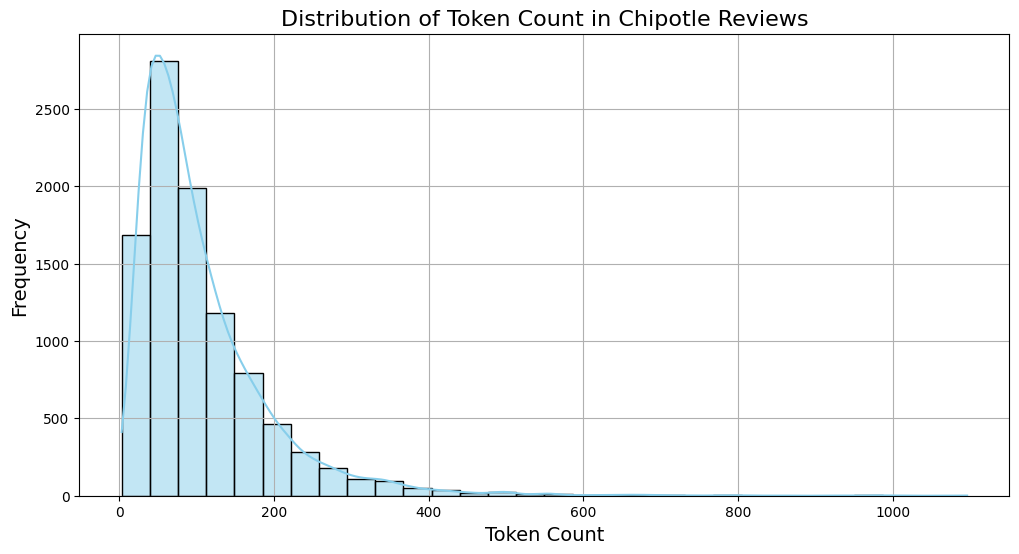

In [ ]:
# Statistics and Distribution of token_count in chipotle_r

# Display basic statistics
token_count_stats = chipotle_r['token_count'].describe()
print("📊 Token Count Statistics:")
print(token_count_stats)
print()
print()


# Visualization: Distribution of token_count
plt.figure(figsize=(12, 6))
sns.histplot(chipotle_r['token_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Token Count in Chipotle Reviews', fontsize=16)
plt.xlabel('Token Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

#### Stats and Distribution for Taco Bell review's token

📊 Token Count Statistics:
count    8636.000000
mean       96.563224
std        87.354221
min         7.000000
25%        43.000000
50%        71.000000
75%       120.000000
max      1154.000000
Name: token_count, dtype: float64




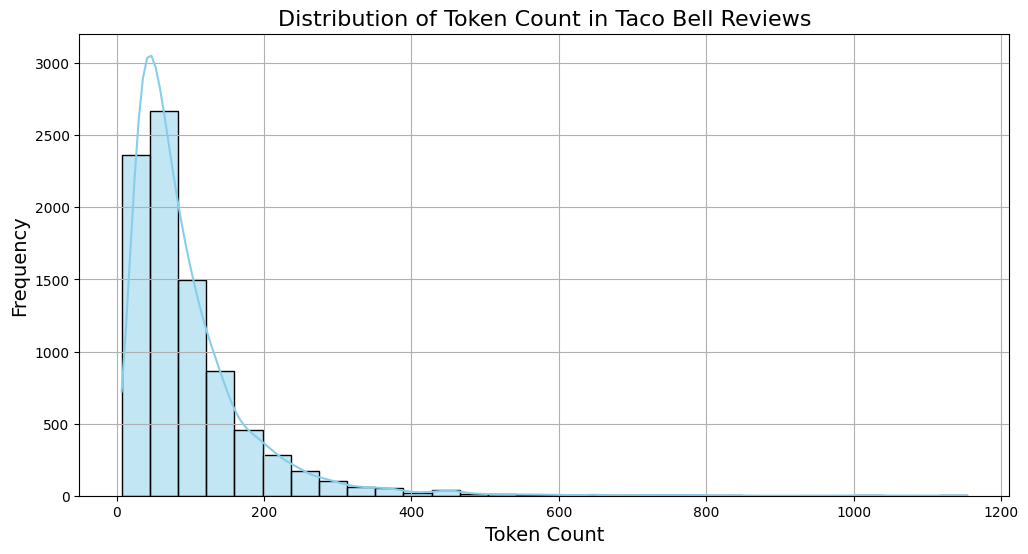

In [ ]:
# Statistics and Distribution of token_count in taco_r

# Display basic statistics
token_count_stats = taco_r['token_count'].describe()
print("📊 Token Count Statistics:")
print(token_count_stats)
print()
print()

# Visualization: Distribution of token_count
plt.figure(figsize=(12, 6))
sns.histplot(taco_r['token_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Token Count in Taco Bell Reviews', fontsize=16)
plt.xlabel('Token Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

### c. Number of unique words (i.e., size of vocabulary)

In [ ]:
# Normalization function
def normalize(review, lowercase=True, remove_stopwords=True):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = [token.lemma_ for token in doc if not remove_stopwords or (remove_stopwords and not token.is_stop)]
    return " ".join(lemmatized)

In [ ]:
# Apply normalization to all reviews

chipotle_r['normalized_text'] = chipotle_r['text'].apply(lambda x: normalize(x))
taco_r['normalized_text'] = taco_r['text'].apply(lambda x: normalize(x))

In [ ]:
# taco_r.normalized_text first row

taco_r.head(5)

,review_id,user_id,business_id,stars,text,token_count,normalized_text
875,Ax8lbP7yYV_Ag2JwK-LorQ,EJqV61HlYmFEmzcIaRVVOw,tpSeNezanZDvsXWR7Hhi1w,1,"Literally, the worst Taco Bell I have ever bee...",61,"literally , bad taco bell . restaurant filthy ..."
1374,Um59sqw4ulhSmAfAuYwpeA,7ajfMmBJGkFU1kTur3DkkA,K_WZrMHAjqZ5DThAw4ZKMQ,3,Can't go wrong with some Todd Cobell!,9,wrong todd cobell !
1817,9O5TrnTl7OftHl2a7bQGOg,BGqAuyW767YnAQU1qOeV3g,X8k7N03buo2bBbUUfcAltQ,1,Went to this Taco Bell last night. It was 1 3...,68,go taco bell night . 1 30 say 30 minute clos...
3110,-Xm4_Mwi3P5vfXYlOJA5tA,Zsdee1KEpMwjg5cqx-VWrQ,FZCj995CEL2G-JTiLC3Azw,3,"If you want to get in and out quick, this KFC/...",122,"want quick , kfc / taco bell "" ok "" fast food ..."
4475,R3AtZ63S87-sAzAFpcia8A,1EJYgQ-ja_UbTWR_FDj4_A,fXsdsGnTntaRWbfUxP3wXw,3,No complaints as far as Taco Bells go. Terribl...,54,complaint far taco bell . terrible terribly de...


In [ ]:
from collections import Counter

# Tokenization after normalization with batch processing
chipotle_normalized_tokens = []
taco_normalized_tokens = []

# Batch processing for Chipotle reviews
for doc in nlp.pipe(chipotle_r['normalized_text'], disable=["parser", "ner"], batch_size=1000):
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    chipotle_normalized_tokens.extend(tokens)

# Batch processing for Taco reviews
for doc in nlp.pipe(taco_r['normalized_text'], disable=["parser", "ner"], batch_size=1000):
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    taco_normalized_tokens.extend(tokens)

In [ ]:
# Count unique tokens
chipotle_unique_normalized_tokens = set(chipotle_normalized_tokens)
taco_unique_normalized_tokens = set(taco_normalized_tokens)

# Calculate vocabulary sizes
chipotle_vocabulary_size_normalized = len(chipotle_unique_normalized_tokens)
taco_vocabulary_size_normalized = len(taco_unique_normalized_tokens)

# Display the vocabulary size
print(f"📚 Number of Unique Words After Normalization (Chipotle): {chipotle_vocabulary_size_normalized}")
print(f"📚 Number of Unique Words After Normalization (Taco): {taco_vocabulary_size_normalized}")

# Display top 20 most used tokens for Chipotle and Taco reviews
chipotle_top_20_tokens = Counter(chipotle_normalized_tokens).most_common(20)
taco_top_20_tokens = Counter(taco_normalized_tokens).most_common(20)

# Display the top 20 tokens
print("\n🍟 Top 20 Most Used Tokens in Chipotle Reviews:")
for token, count in chipotle_top_20_tokens:
    print(f"{token}: {count}")

print("\n🌮 Top 20 Most Used Tokens in Taco Reviews:")
for token, count in taco_top_20_tokens:
    print(f"{token}: {count}")

📚 Number of Unique Words After Normalization (Chipotle): 13071
📚 Number of Unique Words After Normalization (Taco): 12152

🍟 Top 20 Most Used Tokens in Chipotle Reviews:
chipotle: 9028
order: 7926
food: 7490
time: 5420
location: 5028
burrito: 3741
like: 3352
bowl: 3333
place: 3114
good: 3106
line: 2952
go: 2848
service: 2810
get: 2769
eat: 2373
come: 2357
staff: 2302
wait: 2193
ask: 2145
customer: 2119

🌮 Top 20 Most Used Tokens in Taco Reviews:
taco: 9332
order: 8112
bell: 6833
food: 6581
time: 4350
drive: 4078
go: 2760
location: 2759
get: 2747
service: 2654
place: 2558
wait: 2456
like: 2305
come: 2280
minute: 2128
good: 2084
bad: 1980
fast: 1888
say: 1831
ask: 1828


### d.Average review length (i.e., average number of words of each review)

$$
\text{Average Review Length} = \frac{\text{Total Tokens}}{\text{Number of Reviews}}
$$

In [ ]:
# Function to calculate average review length
def average_review_length(tokens_list, num_reviews):
    return len(tokens_list) / num_reviews

# Calculate the average review length for Chipotle and Taco reviews
chipotle_avg_review_length = average_review_length(chipotle_normalized_tokens, len(chipotle_r))
taco_avg_review_length = average_review_length(taco_normalized_tokens, len(taco_r))

# Display the results
print(f"📏 Average Review Length (Chipotle Reviews): {chipotle_avg_review_length:.2f} words per review")
print(f"📏 Average Review Length (Taco Bell Reviews): {taco_avg_review_length:.2f} words per review")

📏 Average Review Length (Chipotle Reviews): 38.07 words per review
📏 Average Review Length (Taco Bell Reviews): 35.08 words per review


### e.Number of unique customers

In [ ]:
# Number of unique user_id in each chipotle and Taco Bell

print('Number of unique customers in Chipotle:',chipotle_r['user_id'].nunique())
print('Number of unique customers in Taco Bell:',taco_r['user_id'].nunique())

Number of unique customers in Chipotle: 8752
Number of unique customers in Taco Bell: 7653


In [ ]:
# Average number of reviews that each person writes

chipotle_avg_reviews_per_user = chipotle_r.groupby('user_id')['review_id'].count().mean()
taco_avg_reviews_per = taco_r.groupby('user_id')['review_id'].count().mean()

print('Average number of reviews that each person writes in Chipotle:',chipotle_avg_reviews_per_user)
print('Average number of reviews that each person writes in Taco Bell:',taco_avg_reviews_per)

Average number of reviews that each person writes in Chipotle: 1.1164305301645339
Average number of reviews that each person writes in Taco Bell: 1.1284463609042206


### f.Distribution of stars

#### Distribution of stars for Chipotle

📊 Statistics for Chipotle Review Stars:
count    9771.000000
mean        2.477945
std         1.544363
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: stars, dtype: float64


<ipython-input-42-69defe1cd793>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=chipotle_r, palette='viridis')


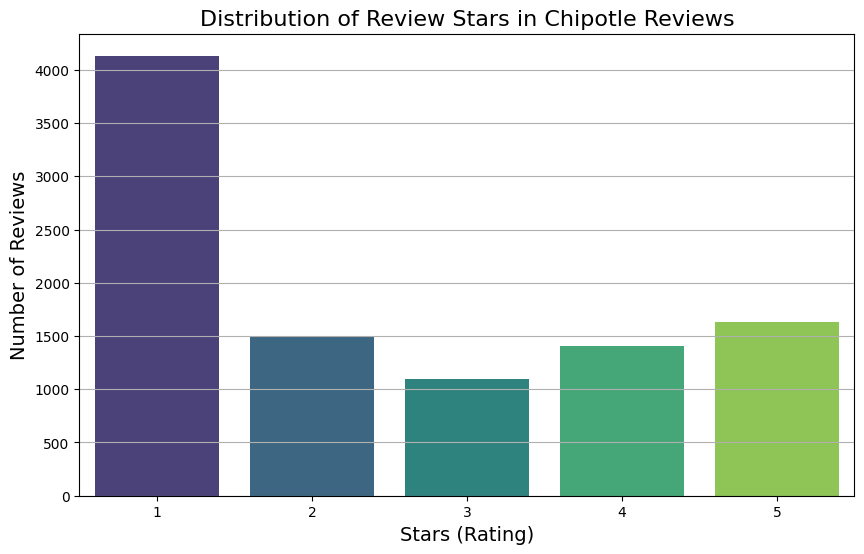

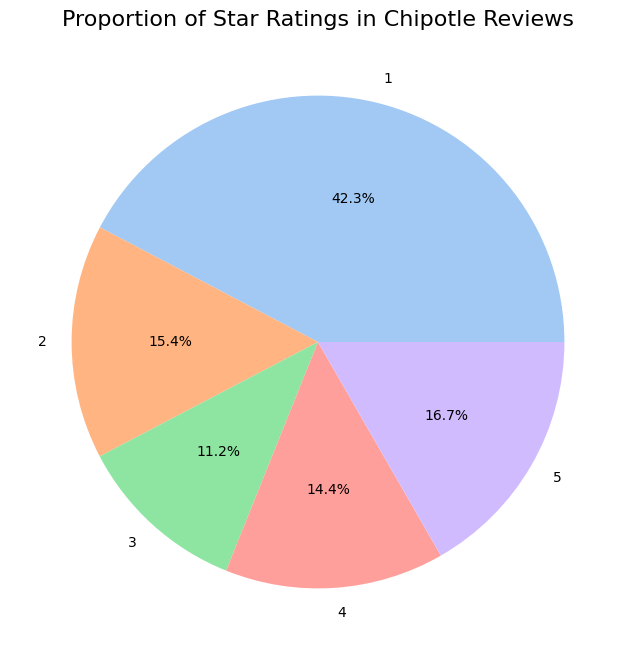

In [ ]:
# Statistics and Distribution of the stars in Chipotle

# Descriptive statistics for 'stars'
stars_stats = chipotle_r['stars'].describe()
print("📊 Statistics for Chipotle Review Stars:")
print(stars_stats)

# Visualization - Distribution of 'stars'
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=chipotle_r, palette='viridis')
plt.title('Distribution of Review Stars in Chipotle Reviews', fontsize=16)
plt.xlabel('Stars (Rating)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y')

plt.show()

# Pie Chart for better visualization
plt.figure(figsize=(8, 8))
chipotle_r['stars'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Star Ratings in Chipotle Reviews', fontsize=16)
plt.ylabel('')  # Remove y-label for a cleaner look
plt.show()

#### Distribution of stars for Taco Bell

📊 Statistics for Taco Bell Review Stars:
count    8636.000000
mean        2.074919
std         1.503462
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: stars, dtype: float64


<ipython-input-44-d9dbec9fecae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=taco_r, palette='magma')


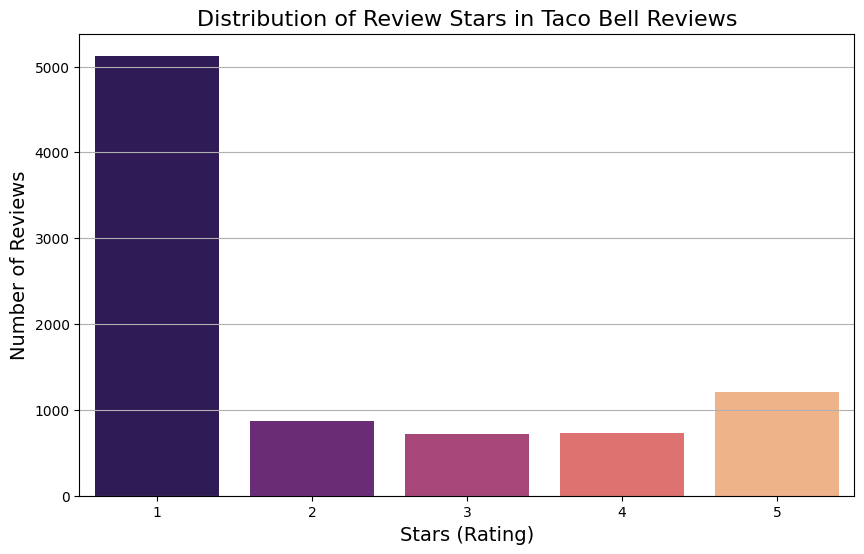

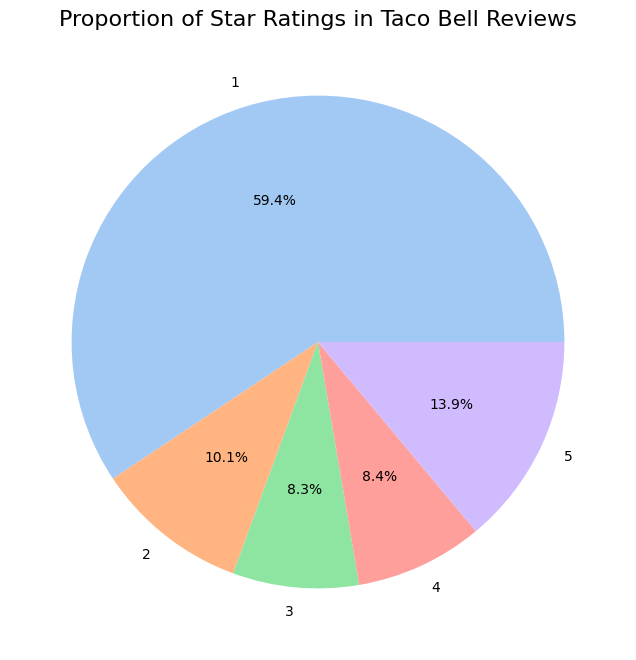

In [ ]:
# Statistics and Distribution of the stars in Taco Bell

# Descriptive statistics for 'stars'
stars_stats_taco = taco_r['stars'].describe()
print("📊 Statistics for Taco Bell Review Stars:")
print(stars_stats_taco)

# Visualization - Distribution of 'stars'
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=taco_r, palette='magma')
plt.title('Distribution of Review Stars in Taco Bell Reviews', fontsize=16)
plt.xlabel('Stars (Rating)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y')

plt.show()

# Pie Chart for better visualization
plt.figure(figsize=(8, 8))
taco_r['stars'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Star Ratings in Taco Bell Reviews', fontsize=16)
plt.ylabel('')  # Remove y-label for a cleaner look
plt.show()

## 5.Data Evaluation

### a. How the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions:

The dataset includes reviews, customer demographics, business attributes, and regional details, making it well-suited for analyzing consumer preferences, business performance, and satisfaction levels. By examining review sentiment, customer feedback, and location-based trends, we can identify factors influencing customer choices, assess brand perception, and detect emerging patterns in consumer behavior. This enables a data-driven approach to understanding market positioning and improving business strategies

### b.Whether the sample size is appropriate, and why:

The dataset size appears sufficient for meaningful statistical analysis. It includes a large volume of reviews, diverse businesses, and customer interactions. Currently we have 9771 reviews from Chipotle and 8636 reviews from Taco Bell. However, sample representativeness should be verified to ensure conclusions apply broadly.

### c. Whether the selected data could be biased in certain dimensions in your analysis:

Since both Chipotle and Taco Bell are tech-savvy brands with strong online engagement, they are well-represented in Yelp reviews. However, potential biases may still arise from the dataset, such as overrepresentation of younger, tech-savvy customers, polarization of reviews toward extreme opinions, and regional variations in review activity.

### d.The potential challenges to process the data:

Challenges include handling missing or inconsistent data, normalizing textual reviews, dealing with duplicates, and computational time associated with large-scale data processing. Sentiment analysis and NLP techniques require careful preprocessing for accuracy.

## 6.Preliminary Data Exploration
Sentiment Analysis on Textual Data: To understand the overall sentiment on the focal business, we will apply Natural Language Processing (NLP) techniques to analyze customer reviews. Below are the steps involved:

Text Preprocessing:

Tokenization, stop-word removal, lemmatization, and lowercasing will be performed to clean the textual data.
Sentiment Analysis Methods:

VADER (Valence Aware Dictionary and sEntiment Reasoner):

A rule-based sentiment analyzer suitable for short reviews.
TextBlob: A lexicon-based approach that provides polarity and subjectivity scores.

Exploratory Visualizations:

Distribution of sentiment scores (positive, neutral, and negative reviews).
Word clouds to highlight frequently used words in positive and negative reviews.
Temporal trends in sentiment to analyze how customer satisfaction changes over time.
Expected Insights:

Identify the overall sentiment towards the business (positive, negative, or neutral).
Recognize key factors contributing to positive and negative feedback.
Compare sentiment variations across different business categories or regions.
By conducting this sentiment analysis, we aim to uncover valuable insights about customer perceptions and identify potential areas for business improvement.

## 7.Proposed Solution
For this project, we plan to use the following machine learning and unstructured data analytics methods:

Sentiment Analysis: Utilizing Natural Language Processing (NLP) techniques to assess customer sentiments toward businesses. Techniques like VADER (for rule-based sentiment analysis) or BERT (for deep learning-based sentiment analysis) will be explored.

Topic Modeling: Using methods like Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF) to identify key themes and topics in the reviews, such as health, service quality, and pricing.

Clustering: Employing K-Means or hierarchical clustering to segment customers or businesses based on review patterns, preferences, and sentiment.

Prediction: Leveraging machine learning models (e.g., Random Forest, XGBoost) or deep learning models (e.g., LSTM, BERT) to predict business ratings, sentiment trends, or customer behavior based on review content and customer feedback. These models will provide actionable insights for improving customer experience and business performance.


These methods will help extract meaningful insights, improve customer satisfaction predictions, and provide actionable business recommendations.

In [ ]:
# Converting to html
!pip install jupyter
!pip install nbconvert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0


In [ ]:
!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/ProjectEDA_Team212.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/ProjectEDA_Team212.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 678134 bytes to /content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/ProjectEDA_Team212.html


In [ ]:
# combine 'taco_r' dataset and 'chipotle_r' dataset

combined_r = pd.concat([taco_r, chipotle_r], ignore_index=True)


In [ ]:
# combine 'taco_b' dataset and 'chipotle_b' dataset

combined_b = pd.concat([taco_b, chipotle_b], ignore_index=True)

In [ ]:
# convert combine_r and combine_b to csv file

combined_r.to_csv('/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/combined_r.csv', index=False)
#combined_b.to_csv('/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/combined_b.csv', index=False)

In [ ]:
# convert combine_r and combine_b to excel file

combined_r.to_excel('/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/combined_r.xlsx', index=False)
#combined_b.to_excel('/content/drive/MyDrive/Colab Notebooks/Unstructed data/Project/combined_b.xlsx', index=False)